<a href="https://colab.research.google.com/github/NayelySaldivar/Prediccion-produccion-electricidad/blob/main/notebooks/regresi%C3%B3n%2C_ruido_y_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

import matplotlib.pyplot as plt

In [2]:
def genera_puntos_regresion(m, b, sigma, size=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar'''
    
    
    xdata = np.linspace(-1.0, 1.0, size)
    errors = np.random.normal(0, sigma, size) 
    ydata = m * xdata + b + errors

    return xdata, ydata

In [9]:
np.linspace(-1.0, 1.0, 11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

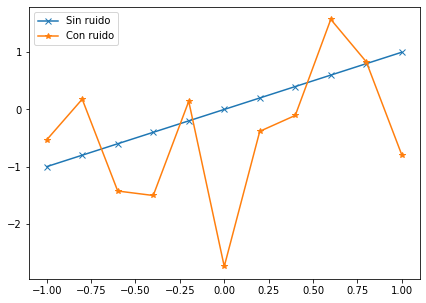

In [26]:
x, y = genera_puntos_regresion(1,0,1,11)

plt.figure(figsize= (7,5))
plt.plot(x,x, label = 'Sin ruido', marker = 'x')
plt.plot(x,y, label= 'Con ruido', marker = '*')
plt.legend()
plt.show();

# Simulación de puntos en 2d a partir de la ecuación de una recta

## Sin Ruido 

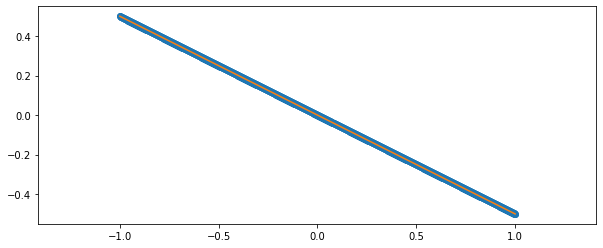

In [20]:
m = -0.5
b = 0
sigma = 0

xs, ys = genera_puntos_regresion(m, b, sigma, size=1000)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

## Con Ruido

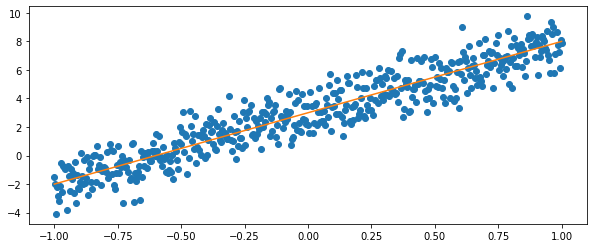

In [29]:
m = 5
b = 3
sigma = 1

fig = plt.figure(figsize = (10, 4))
xs, ys = genera_puntos_regresion(m, b, sigma, size=500)

plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)
plt.show()

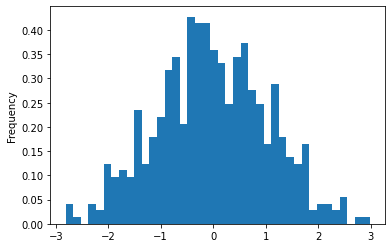

In [31]:
errores = ys -  m * xs - b 
pd.Series(errores).plot.hist(bins=40, density = True);

# Simulación de Ruido blanco
* media constante
* varianza constante
* no tiene autocorrelaciones significativas

### iid

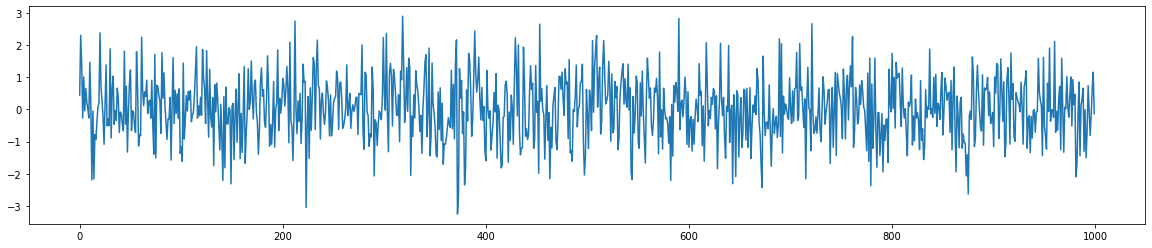

In [32]:
media = 0
std = 1
num_muestras = 1000
ruido_blanco = pd.Series(np.random.normal(media, std, num_muestras))

ruido_blanco.plot(figsize = (20,4))
plt.show()

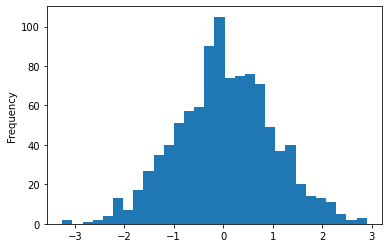

In [33]:
ruido_blanco.plot.hist(bins=30)

La función de autocorrelación captura los efectos directos e indirectos del valor anterior sobre el valor presente.
Mide la correlación de un serie con una versión desplazada en el tiempo de sí misma. 

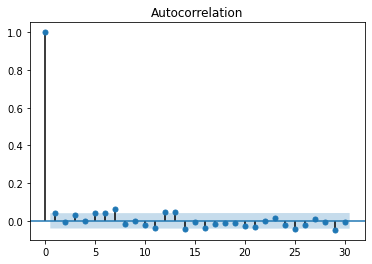

In [43]:
# Función de autocorrelación
plot_acf(ruido_blanco, alpha=0.2, lags=30)
plt.show()

La función de autocorrelacion parcial mide la correlación entre observaciones de tiempo que se encuentran separadas por k unidades en el tiempo.

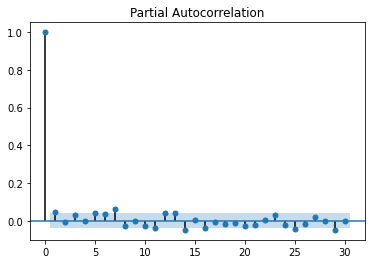

In [44]:
# Función de autocorrelación parcial
plot_pacf(ruido_blanco, alpha=.2, lags=30)
plt.show()

### otros ruidos blancos

####__Ejemplo 1 (Exercise 0.2.3 de la notas)__

1) Sea $X_t$ un proceso iid y $Y$ una variable aleatoria con distribución Bernoulli con $p = 0.5$

Entonces la variable aleatoria 

$Z_t= X_t~Y- X_t(Y-1)^2$ es un ruido blanco

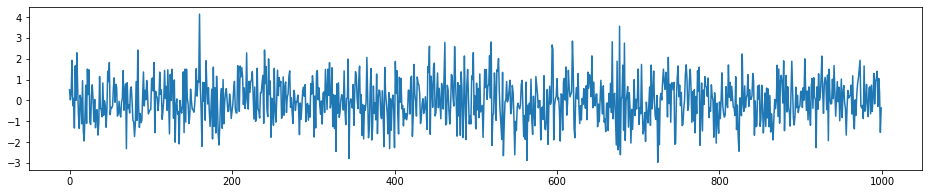

In [50]:
num_muestras = 1000
X_t = pd.Series(np.random.normal(size= num_muestras))
Y = pd.Series(np.random.binomial(1, p = 0.5, size = num_muestras))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

Z_t.plot(figsize = (16,3))
plt.show()

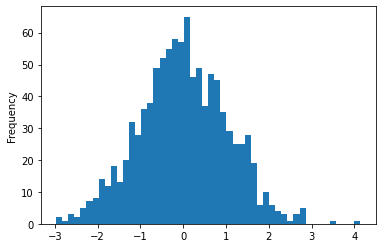

In [51]:
Z_t.plot.hist(bins=50)

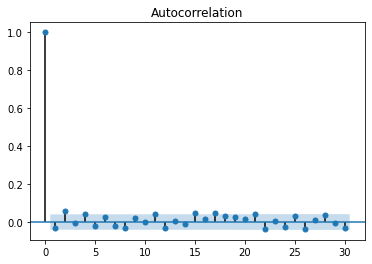

In [52]:
# Función de autocorrelación
plot_acf(Z_t,   alpha=0.2, lags=30)
plt.show()

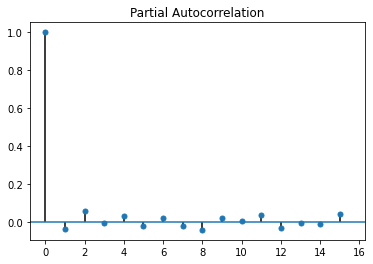

In [53]:
# Función de autocorrelación parcial

plot_pacf(Z_t, alpha=1, lags=15)
plt.show()

####__Ejemplo 2 (Excercise 0.2.3 de la notas)__

2) Sea $X_t$ un proceso iid y el proceso estocástico definido por:

- $Z_t = X_t$ cuando t es par, y 
- $Z_t = \frac{1}{\sqrt{2}}(X^2_{t-1}-1)$ cuando t es impar,

es un ruido blanco

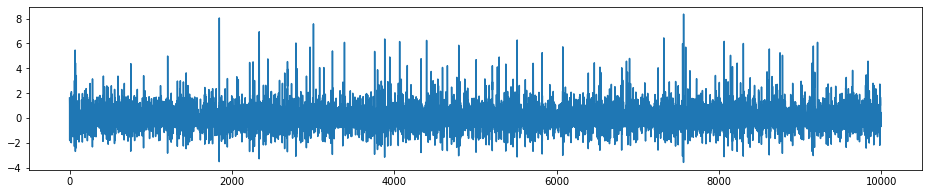

In [54]:
num_muestras  = 10000
Xt = pd.Series(np.random.normal(size= num_muestras))
Zt = pd.Series(np.zeros(num_muestras))
for i in range(len(Zt)):
  if i % 2 == 0:
    Zt[i]= Xt[i]
  else:
    Zt[i] = 1/np.sqrt(2)*(pow(Xt[i-1], 2)-1)

Zt.plot(figsize = (16,3))
plt.show()

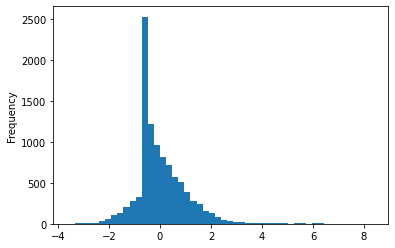

In [55]:
Zt.plot.hist(bins=50)
plt.show()

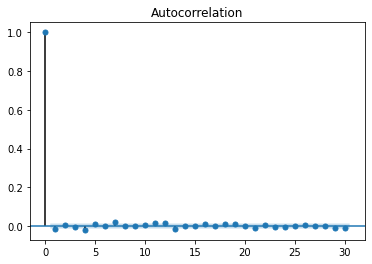

In [56]:
# Función de autocorrelación
plot_acf(Zt, alpha=0.2, lags=30)
plt.show()

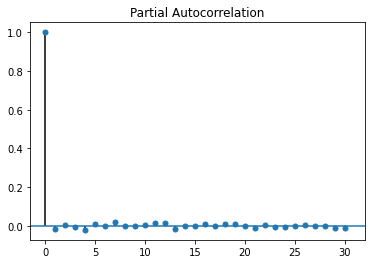

In [58]:
# Función de autocorrelación parcial
plot_pacf(Zt, alpha=1, lags=30)
plt.show()

# Simulación de un proceso autorregresivo  (AR)

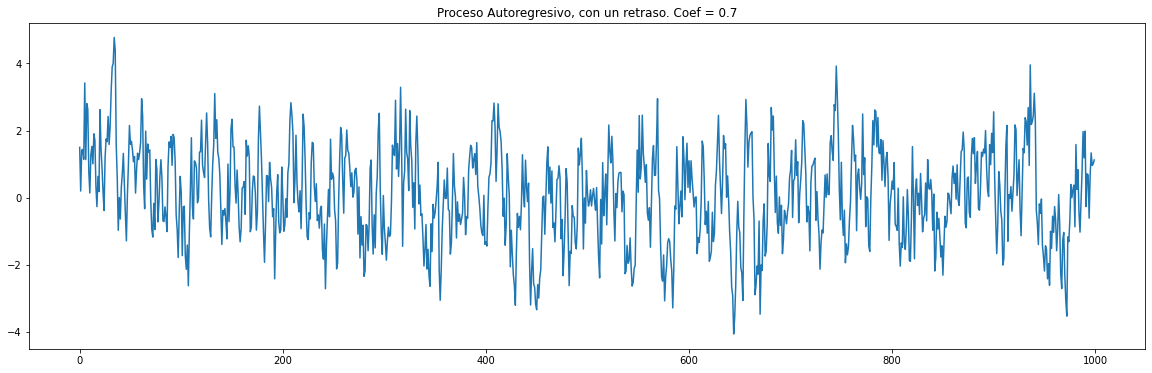

In [73]:
coef = .7 
ar = np.array([1, - coef]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
#plt.rc("figure", figsize=(20,4))

AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

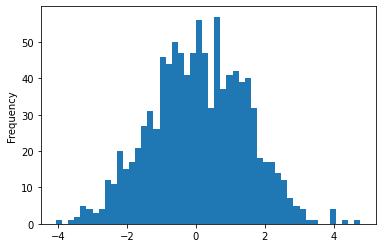

In [75]:
AR_simulacion.plot.hist(bins=50)

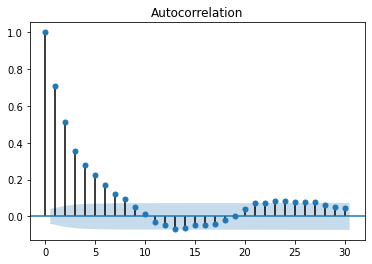

In [76]:
# Función de autocorrelación
plot_acf(AR_simulacion, alpha=0.2, lags=30)
plt.show()

En los proceso autorregresivos la función de autocorrelación parcial **(pacf)** se utiliza para investigar cuántos retrasos es necesario considerar en el modelo **Auto Regresivo**

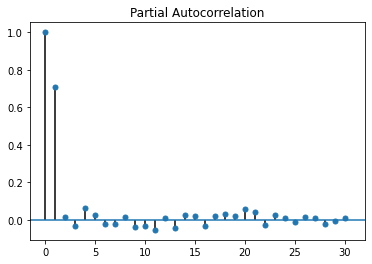

In [77]:
# Función de autocorrelación parcial

plot_pacf(AR_simulacion, alpha=1, lags=30)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

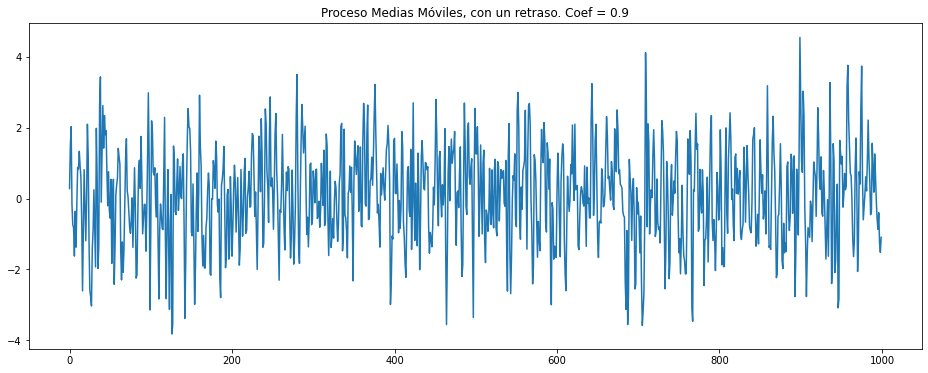

In [94]:
coef = .9
ar = np.array([1]) 
ma = np.array([1, coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=1000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

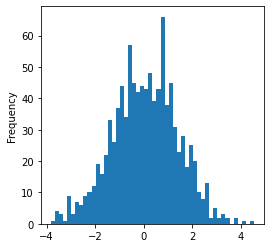

In [95]:
MA_simulacion.plot.hist(figsize=(4,4), bins=50)

Para los modelos de **medias móviles** se utiliza la función de autocorrelación (**acf**) para investigar el orden del modelo. 

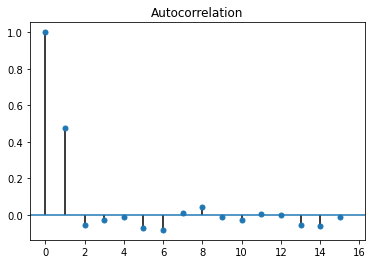

In [96]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()

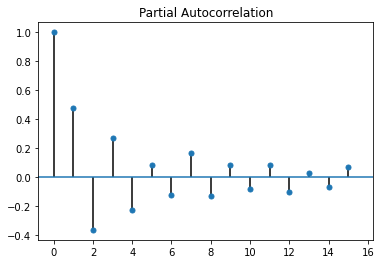

In [97]:
# Función de autocorrelación
plot_pacf(MA_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de un proceso autorregresivo  (AR) Orden 2

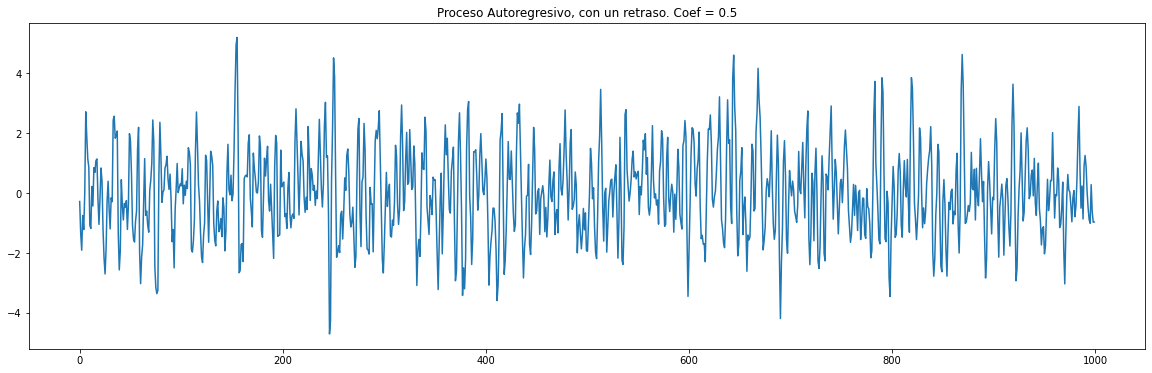

In [82]:
ar = np.array([1, - 0.9, .5]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess( ar, ma)
#plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=1000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

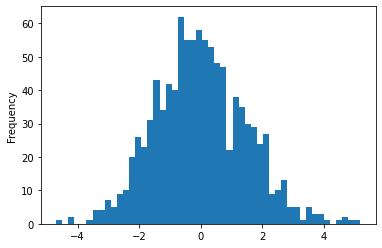

In [83]:
AR_simulacion.plot.hist(bins=50)

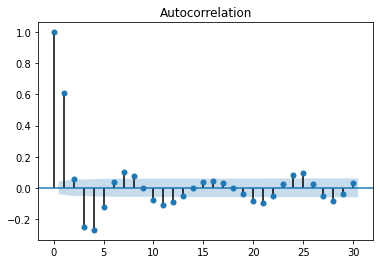

In [84]:
# Función de autocorrelación
plot_acf(AR_simulacion, alpha=0.2, lags=30)
plt.show()

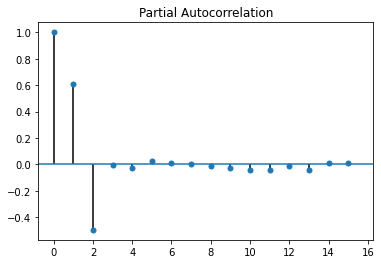

In [85]:
# Función de autocorrelación parcial
plot_pacf(AR_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA) con dos coeficientes

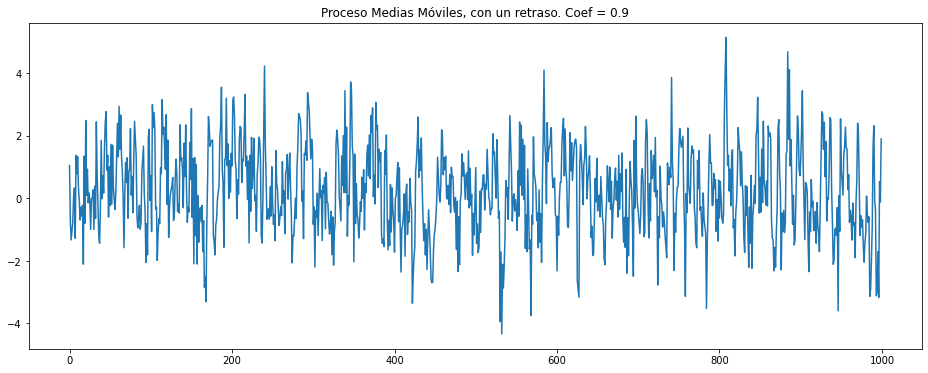

In [98]:
coef = .9
ar = np.array([1]) 
ma = np.array([1, 0.5, 0.8])
# ma = np.array([1,coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=1000))
MA_simulacion.plot(figsize = (16,6), title=titulo)
plt.show()

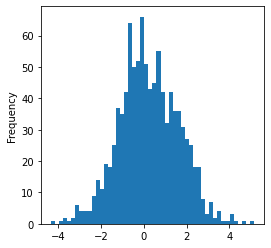

In [99]:
MA_simulacion.plot.hist(figsize=(4,4), bins=50)

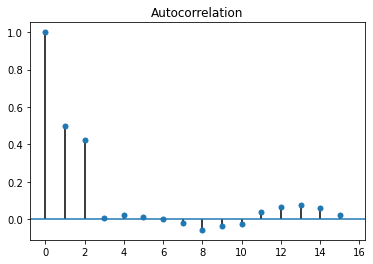

In [100]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()

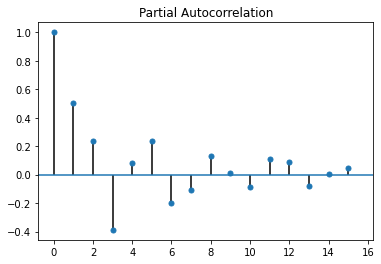

In [101]:
# Función de autocorrelación parcial
plot_pacf(MA_simulacion, alpha=1, lags=15)
plt.show()